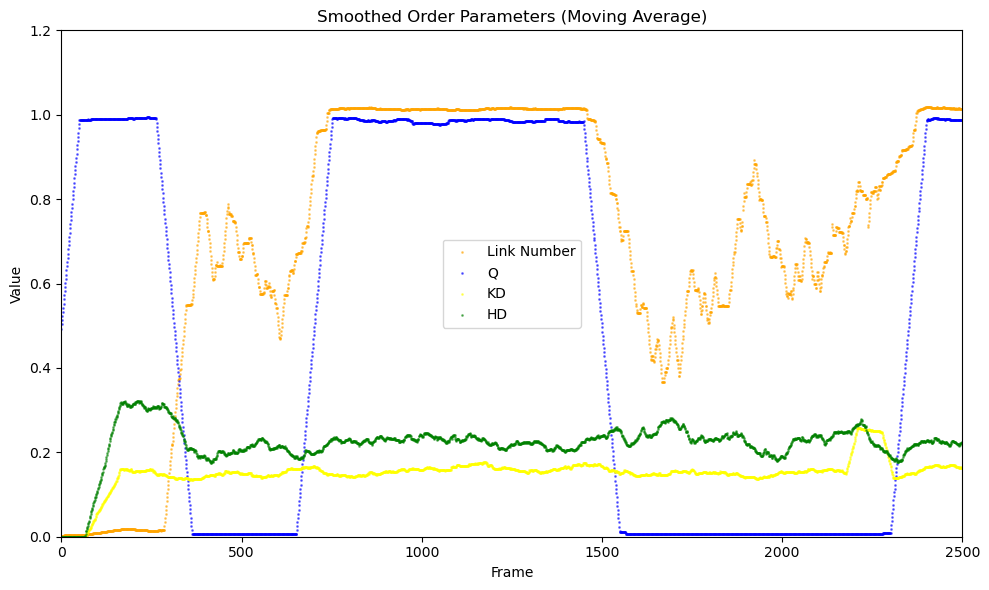

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 定义滑动平均函数
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# 设置图形大小
plt.figure(figsize=(10, 6))

for i in range(1):
    n = int(i + 1)
    trj = np.loadtxt(
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/COLVAR1',
        comments=['@', '#']
    )
    
    # 提取并归一化数据
    NT1 = trj[:, 1]
    NT2 = trj[:, 2]
    NT3 = trj[:, 3] / max(trj[:, 3])
    NT4 = trj[:, 4] / max(trj[:, 4])

    # 应用滑动平均
    window = 100  # 滑动窗口大小，可根据需要调整
    NT1_smooth = moving_average(NT1, window)
    NT2_smooth = moving_average(NT2, window)
    NT3_smooth = moving_average(NT3, window)
    NT4_smooth = moving_average(NT4, window)

    # 帧编号
    x = np.arange(len(NT1))

    # 绘图（平滑数据）
    plt.scatter(x, NT1_smooth, label='Link Number', color='orange',s=1,alpha=0.5)
    plt.scatter(x, NT2_smooth, label='Q', color='blue',s=1,alpha=0.5)
    plt.scatter(x, NT3_smooth, label='KD', color='yellow',s=1,alpha=0.5)
    plt.scatter(x, NT4_smooth, label='HD', color='green',s=1,alpha=0.5)

    plt.ylim(0, 1.2)
    plt.xlim(0, 2500)
    plt.legend()
    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title('Smoothed Order Parameters (Moving Average)')

plt.tight_layout()
plt.show()


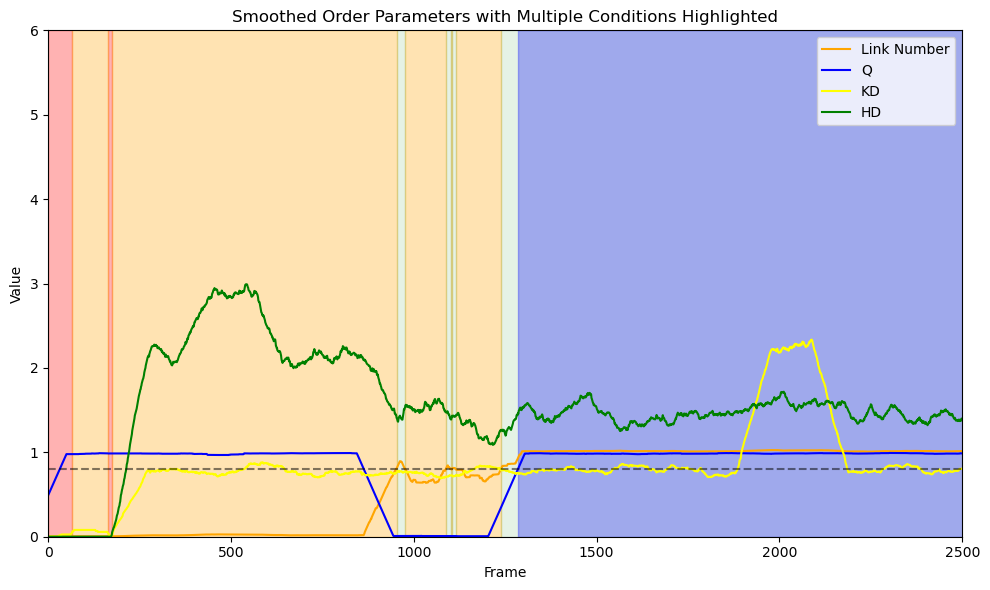

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义滑动平均函数
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# 函数：从布尔数组中提取连续区间并画阴影
def highlight_condition_regions(condition_array, color='yellow', alpha=0.3):
    in_region = False
    start = 0
    for i in range(len(condition_array)):
        if condition_array[i] and not in_region:
            start = i
            in_region = True
        elif not condition_array[i] and in_region:
            end = i
            plt.axvspan(start, end, color=color, alpha=alpha)
            in_region = False
    if in_region:
        plt.axvspan(start, len(condition_array), color=color, alpha=alpha)

# 设置图形大小
plt.figure(figsize=(10, 6))

# 读取数据
trj = np.loadtxt(
    '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/COLVAR2',
    comments=['@', '#']
)

link = np.loadtxt(f'/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/winding_number_out_para0.6_long/0.35/link_num2.txt', comments=['@', '#'])

# 数据处理
NT1 = link[:, 1]
NT2 = trj[:, 2]
NT3 = trj[:, 3]
NT4 = trj[:, 4] 
window = 100
NT1_smooth = moving_average(NT1, window)
NT2_smooth = moving_average(NT2, window)
NT3_smooth = moving_average(NT3, window)
NT4_smooth = moving_average(NT4, window)
x = np.arange(len(NT1))

# ===== 多条件阴影区域绘制 =====
# 条件1：
cond1 = (NT3_smooth < 0.5) & (NT4_smooth < 0.5)
highlight_condition_regions(cond1, color='red', alpha=0.3)

# 条件2：
cond2 = (NT1_smooth <0.8) & ((NT3_smooth > 0.5)|(NT4_smooth > 0.5))
highlight_condition_regions(cond2, color='orange', alpha=0.3)

# 条件3：
cond3 = (NT1_smooth > 0.8)
highlight_condition_regions(cond3, color='green', alpha=0.1)

# 条件4：
cond4 = (NT1_smooth > 0.8) & (NT2_smooth > 0.8)
highlight_condition_regions(cond4, color='blue', alpha=0.3)

# ===== 绘图 =====
plt.plot(x, NT1_smooth, label='Link Number', color='orange')
plt.plot(x, NT2_smooth, label='Q', color='blue')
plt.plot(x, NT3_smooth/10, label='KD', color='yellow')
plt.plot(x, NT4_smooth/10, label='HD', color='green')

# y=0.8
plt.axhline(y=0.8, color='black', linestyle='--', alpha=0.5)

plt.ylim(0, 6)
plt.xlim(0, 2500)
plt.xlabel('Frame')
plt.ylabel('Value')
plt.title('Smoothed Order Parameters with Multiple Conditions Highlighted')
plt.legend()
plt.tight_layout()
plt.show()


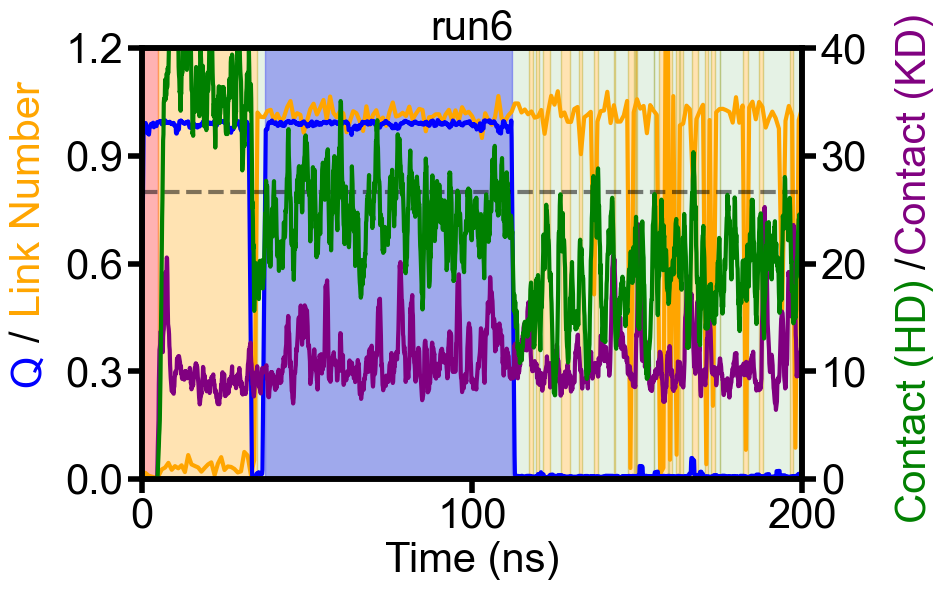

In [114]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlesize': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 30,
    'figure.figsize': (10, 6),
    'axes.linewidth': 4,
    'xtick.major.size': 10,
    'ytick.major.size': 10,
    'xtick.minor.size': 5,
    'ytick.minor.size': 5,
    'xtick.major.width': 4,
    'ytick.major.width': 4,
    'xtick.minor.width': 4,
    'ytick.minor.width': 4,
    'axes.grid': False,
})

# 定义滑动平均函数
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# 函数：从布尔数组中提取连续区间并画阴影
def highlight_condition_regions(condition_array, color='yellow', alpha=0.3):
    in_region = False
    start = 0
    for i in range(len(condition_array)):
        if condition_array[i] and not in_region:
            start = i
            in_region = True
        elif not condition_array[i] and in_region:
            end = i
            ax1.axvspan(x[start], x[end], color=color, alpha=alpha)
            in_region = False
    if in_region:
        ax1.axvspan(x[start], x[-1], color=color, alpha=alpha)

# 设置图形大小
fig, ax1 = plt.subplots(figsize=(10, 6))

# 读取数据
trj = np.loadtxt(
    '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/COLVAR25',
    comments=['@', '#']
)

# 数据处理
NT1 = trj[:, 1]
NT2 = trj[:, 2]
NT3 = trj[:, 3]
NT4 = trj[:, 4]
window = 10
NT1_smooth = moving_average(NT1, window)
NT2_smooth = moving_average(NT2, window)
NT3_smooth = moving_average(NT3, window)
NT4_smooth = moving_average(NT4, window)

x = np.arange(len(NT1))/10  # 转换为 ns 单位
x_sampled = x[::10]
NT1_sampled = NT1[::10]

# 创建右侧坐标轴
ax2 = ax1.twinx()

# 多条件阴影区域绘制
cond1 = (NT3_smooth < 0.5) & (NT4_smooth < 0.5)
highlight_condition_regions(cond1, color='red', alpha=0.3)

cond2 = (NT1_smooth < 0.8) & ((NT3_smooth > 0.5) | (NT4_smooth > 0.5))
highlight_condition_regions(cond2, color='orange', alpha=0.3)

cond3 = (NT1_smooth > 0.8)
highlight_condition_regions(cond3, color='green', alpha=0.1)

cond4 = (NT1_smooth > 0.8) & (NT2_smooth > 0.8)
highlight_condition_regions(cond4, color='blue', alpha=0.3)

# 主坐标轴绘图（左边）
ax1.plot(x_sampled, NT1_sampled, label='Link Number', color='orange', linewidth=3)
ax1.plot(x, NT2_smooth, label='Q', color='blue', linewidth=3)
ax1.axhline(y=0.8, color='black', linestyle='--', alpha=0.5, linewidth=3)

# 副坐标轴绘图（右边）
ax2.plot(x, NT3_smooth, label='KD (right)', color='purple', linewidth=3)
ax2.plot(x, NT4_smooth, label='HD (right)', color='green', linewidth=3)

# 设置坐标轴范围
ax1.set_ylim(0, 1.2)
ax1.set_yticks([0, 0.3, 0.6, 0.9, 1.2])
ax2.set_ylim(0, 40)
ax2.set_yticks([0, 10, 20, 30, 40])
ax1.set_xlim(0, 200)
ax1.set_xticks([0, 100, 200])

# 设置标签
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('')
ax2.set_ylabel('')

# 手动添加标签
ax1.text(-0.2, 0.65, 'Link Number', color='orange', fontsize=30, 
         ha='left', va='center', transform=ax1.transAxes, rotation=90)
ax1.text(-0.2, 0.33, '/', color='black', fontsize=30, 
         ha='left', va='center', transform=ax1.transAxes, rotation=90)
ax1.text(-0.2, 0.25, 'Q', color='blue', fontsize=30, 
         ha='left', va='center', transform=ax1.transAxes, rotation=90)

ax2.text(1.2, 0.8, 'Contact (KD)', color='purple', fontsize=30, 
         ha='right', va='center', transform=ax1.transAxes, rotation=90)
ax2.text(1.2, 0.5, '/', color='black', fontsize=30, 
         ha='right', va='center', transform=ax1.transAxes, rotation=90)
ax2.text(1.2, 0.18, 'Contact (HD)', color='green', fontsize=30, 
         ha='right', va='center', transform=ax1.transAxes, rotation=90)

# 图标题
plt.title('run6')

# 布局与保存
plt.tight_layout()
plt.savefig("run25.png", dpi=300, bbox_inches='tight')
plt.show()
